<a href="https://colab.research.google.com/github/davidpqc1231/testgit/blob/master/Copy_of_Problem4_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
import torchvision.datasets as datasets
from torchvision import transforms
import torch.nn.functional as F

In [0]:
path = os.getcwd()

### 4.1.1 Train CNN in MNIST

In [0]:
transform = transforms.ToTensor()

In [0]:
train_mnist = datasets.MNIST(root=path,train=True,download=True,transform=transform)
test_mnist = datasets.MNIST(root=path,train=False,download=True,transform=transform)


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw
Processing...
Done!


In [0]:
class Model(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.conv1 = nn.Conv2d(1,16,5,1)
        self.conv2 = nn.Conv2d(16,32,5,1)

        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)

        self.re1 = nn.ReLU()
        self.re2 = nn.ReLU()

        self.mp1 = nn.MaxPool2d(kernel_size=2)
        self.mp2 = nn.MaxPool2d(kernel_size=2)

        self.do = nn.Dropout(p=0.5)

        self.fc1 = nn.Linear(32*4*4,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.re1(x)
        x = self.mp1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.re2(x)
        x = self.mp2(x)

        x = x.view(x.shape[0],-1)
        x = self.do(x)

        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        
        x = F.log_softmax(x,dim=1)
        
        return x

In [0]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device=torch.device('cpu')

In [0]:
model_mnist = Model().to(device)

In [0]:
criterion_mnist = nn.CrossEntropyLoss()
optimizer_mnist = torch.optim.Adam(model_mnist.parameters(),lr=0.001)
epochs = 7

In [0]:
train_loader = DataLoader(train_mnist,batch_size=10,shuffle=True)
test_loader = DataLoader(test_mnist,batch_size=10,shuffle=False)

In [0]:
train_losses_mnist = []
train_correct_mnist = []
test_losses_mnist = []
test_correct_mnist = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    test_mnist_list = [0,0,0,0,0,0,0,0,0,0]
    test_mnist_cor_list = [0,0,0,0,0,0,0,0,0,0]
    
    model_mnist.train()
    for j, (X_train,y_train) in enumerate(train_loader):
        
        j += 1
        y_pred = model_mnist.forward(X_train.to(device))
        loss = criterion_mnist(y_pred,y_train.to(device))
        predicted = torch.max(y_pred,dim=1)[1]
        batch_corr = (predicted.detach().cpu()==y_train).sum()
        trn_corr += batch_corr
        
        optimizer_mnist.zero_grad()
        loss.backward()
        optimizer_mnist.step()
        
        #if j%600 == 0:
        #    acc = trn_corr.item() * 100 / (j*10)
        #    print(f' Epochs{i} batch{j} loss: {loss.item()} accuracy: {acc}')
    
    model_mnist.eval()
    with torch.no_grad():
        for k, (X_test,y_test) in enumerate(test_loader):
            
            k += 1
            y_val = model_mnist.forward(X_test.to(device))
            tst_loss = criterion_mnist(y_val,y_test.to(device))
            predicted = torch.max(y_val,dim=1)[1]
            tst_batch_corr = (predicted.detach().cpu()==y_test).sum()
            tst_corr += tst_batch_corr
            
            for ii in range(10):
                index = y_test[ii].item()
                test_mnist_list[index] += 1
                if predicted[ii].item() == index:
                    test_mnist_cor_list[index] += 1
            
            
            if k%100 == 0:
                acc = tst_corr.item() * 100 / (k*10)
                print(f' Epochs{i} batch{k} loss: {tst_loss.item()} accuracy: {acc}')
        
    
    
    train_losses_mnist.append(loss)
    train_correct_mnist.append(trn_corr)
    test_losses_mnist.append(tst_loss)
    test_correct_mnist.append(tst_corr)

 Epochs0 batch100 loss: 0.003169306321069598 accuracy: 98.5
 Epochs0 batch200 loss: 0.00631761783733964 accuracy: 98.3
 Epochs0 batch300 loss: 0.34386587142944336 accuracy: 97.9
 Epochs0 batch400 loss: 0.0008440304663963616 accuracy: 97.825
 Epochs0 batch500 loss: 0.01025213859975338 accuracy: 97.84
 Epochs0 batch600 loss: 0.09363319724798203 accuracy: 98.05
 Epochs0 batch700 loss: 0.0026960517279803753 accuracy: 98.08571428571429
 Epochs0 batch800 loss: 0.005069609731435776 accuracy: 98.2875
 Epochs0 batch900 loss: 0.0073251002468168736 accuracy: 98.42222222222222
 Epochs0 batch1000 loss: 0.0004833870043512434 accuracy: 98.44
 Epochs1 batch100 loss: 0.0007402328774333 accuracy: 98.3
 Epochs1 batch200 loss: 0.0022521442733705044 accuracy: 98.25
 Epochs1 batch300 loss: 0.19858737289905548 accuracy: 98.16666666666667
 Epochs1 batch400 loss: 0.002214493928477168 accuracy: 98.025
 Epochs1 batch500 loss: 0.00214903661981225 accuracy: 98.18
 Epochs1 batch600 loss: 0.47672995924949646 accurac

### 4.1.2 Train CNN in Fashion MNIST

In [0]:
train_fashion = datasets.FashionMNIST(root=path,train=True,download=True,transform=transform)
test_fashion = datasets.FashionMNIST(root=path,train=False,download=True,transform=transform)


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw
Processing...
Done!


In [0]:
model_fashion = Model().to(device)

In [0]:
criterion_fashion = nn.CrossEntropyLoss()
optimizer_fashion = torch.optim.Adam(model_fashion.parameters(),lr=0.001)
epochs = 10

In [0]:
train_loader = DataLoader(train_fashion,batch_size=10,shuffle=True)
test_loader = DataLoader(test_fashion,batch_size=10,shuffle=False)

In [0]:
train_losses_fashion = []
train_correct_fashion = []
test_losses_fashion = []
test_correct_fashion = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    test_fashion_list = [0,0,0,0,0,0,0,0,0,0]
    test_fashion_cor_list = [0,0,0,0,0,0,0,0,0,0]
    
    model_fashion.train()
    for j, (X_train,y_train) in enumerate(train_loader):
        
        j += 1
        y_pred = model_fashion.forward(X_train.to(device))
        loss = criterion_fashion(y_pred,y_train.to(device))
        predicted = torch.max(y_pred,dim=1)[1]
        batch_corr = (predicted.detach().cpu()==y_train).sum()
        trn_corr += batch_corr
        
        optimizer_fashion.zero_grad()
        loss.backward()
        optimizer_fashion.step()
        
        #if j%600 == 0:
        #    acc = trn_corr.item() * 100 / (j*10)
        #    print(f' Epochs{i} batch{j} loss: {loss.item()} accuracy: {acc}')
    
    model_fashion.eval()
    with torch.no_grad():
        for k, (X_test,y_test) in enumerate(test_loader):
            
            k += 1
            y_val = model_fashion.forward(X_test.to(device))
            tst_loss = criterion_fashion(y_val,y_test.to(device))
            predicted = torch.max(y_val,dim=1)[1]
            tst_batch_corr = (predicted.detach().cpu()==y_test).sum()
            tst_corr += tst_batch_corr
            
            for ii in range(10):
                index = y_test[ii].item()
                test_fashion_list[index] += 1
                if predicted[ii].item() == index:
                    test_fashion_cor_list[index] += 1
            
            if k%100 == 0:
                acc = tst_corr.item() * 100 / (k*10)
                print(f' Epochs{i} batch{k} loss: {tst_loss.item()} accuracy: {acc}')
        
    
    
    train_losses_fashion.append(loss)
    train_correct_fashion.append(trn_corr)
    test_losses_fashion.append(tst_loss)
    test_correct_fashion.append(tst_corr)

 Epochs0 batch100 loss: 0.31506669521331787 accuracy: 87.9
 Epochs0 batch200 loss: 0.050148893147706985 accuracy: 86.9
 Epochs0 batch300 loss: 0.6626607179641724 accuracy: 85.93333333333334
 Epochs0 batch400 loss: 0.105010986328125 accuracy: 85.775
 Epochs0 batch500 loss: 0.304889053106308 accuracy: 86.04
 Epochs0 batch600 loss: 0.12030057609081268 accuracy: 85.73333333333333
 Epochs0 batch700 loss: 0.6767677068710327 accuracy: 85.74285714285715
 Epochs0 batch800 loss: 0.3043646812438965 accuracy: 86.05
 Epochs0 batch900 loss: 0.22702181339263916 accuracy: 85.87777777777778
 Epochs0 batch1000 loss: 0.1165977492928505 accuracy: 85.91
 Epochs1 batch100 loss: 0.27675554156303406 accuracy: 89.4
 Epochs1 batch200 loss: 0.03443719446659088 accuracy: 89.3
 Epochs1 batch300 loss: 0.46519097685813904 accuracy: 88.76666666666667
 Epochs1 batch400 loss: 0.33626261353492737 accuracy: 88.3
 Epochs1 batch500 loss: 0.2983996272087097 accuracy: 88.32
 Epochs1 batch600 loss: 0.07443897426128387 accurac

In [0]:
### 4.2.1 Performance

In [0]:
test_co_mnist = [i/100 for i in test_correct_mnist]

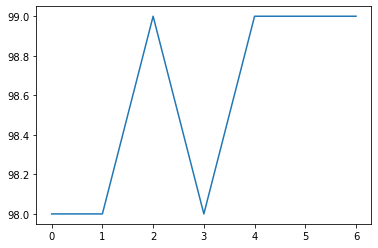

In [0]:
plt.plot(test_co_mnist)

In [0]:
test_mnist_list

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [0]:
test_mnist_cor_list

[975, 1131, 1030, 1007, 978, 879, 943, 1016, 969, 996]

In [0]:
mnist_per_class = np.array(test_mnist_cor_list) / np.array(test_mnist_list)
mnist_per_class

array([0.99489796, 0.99647577, 0.99806202, 0.9970297 , 0.99592668,
       0.98542601, 0.98434238, 0.98832685, 0.99486653, 0.98711596])

In [0]:
test_co_fashion = [i/100 for i in test_correct_fashion]

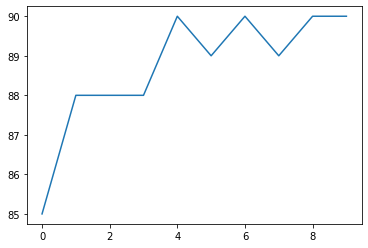

In [0]:
plt.plot(test_co_fashion)

In [0]:
test_fashion_list

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [0]:
test_fashion_cor_list

[895, 978, 866, 908, 866, 970, 659, 963, 979, 966]

In [0]:
fashion_per_class = np.array(test_fashion_cor_list) / np.array(test_fashion_list)
fashion_per_class

array([0.895, 0.978, 0.866, 0.908, 0.866, 0.97 , 0.659, 0.963, 0.979,
       0.966])

### 4.2.2 test each other

In [0]:
torch.save(model_mnist,'mnist.pt')


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
model_f = torch.load('mnist.pt')

In [0]:
train_loader = DataLoader(train_fashion,batch_size=10,shuffle=True)
test_loader = DataLoader(test_fashion,batch_size=10,shuffle=False)

In [0]:
tst_corr = 0
model_f.eval()
test_fashion_list = [0,0,0,0,0,0,0,0,0,0]
test_fashion_cor_list = [0,0,0,0,0,0,0,0,0,0]
with torch.no_grad():
    for k, (X_test,y_test) in enumerate(test_loader):         
        k += 1
        y_val = model_f.forward(X_test.to(device))
        tst_loss = criterion_fashion(y_val,y_test.to(device))
        predicted = torch.max(y_val,dim=1)[1]
    
        tst_batch_corr = (predicted.detach().cpu()==y_test).sum()
        tst_corr += tst_batch_corr
        
        for ii in range(10):
            index = y_test[ii].item()
            test_fashion_list[index] += 1
            if predicted[ii].item() == index:
                test_fashion_cor_list[index] += 1
            
        if k%100 == 0:
            acc = tst_corr.item() * 100 / (k*10)
            print(f' batch{k} loss: {tst_loss.item()} accuracy: {acc}')

 batch100 loss: 3.934504985809326 accuracy: 13.4
 batch200 loss: 2.578129768371582 accuracy: 13.15
 batch300 loss: 3.500739336013794 accuracy: 13.266666666666667
 batch400 loss: 3.7444190979003906 accuracy: 13.425
 batch500 loss: 3.663975954055786 accuracy: 13.68
 batch600 loss: 5.522805213928223 accuracy: 13.5
 batch700 loss: 3.2590396404266357 accuracy: 13.6
 batch800 loss: 3.838921308517456 accuracy: 13.15
 batch900 loss: 4.273087501525879 accuracy: 13.344444444444445
 batch1000 loss: 2.749953508377075 accuracy: 13.46


In [0]:
fashion_per_class = np.array(test_fashion_cor_list) / np.array(test_fashion_list)
fashion_per_class

array([0.013, 0.572, 0.002, 0.007, 0.019, 0.084, 0.   , 0.006, 0.643,
       0.   ])

In [0]:
torch.save(model_fashion,'fashion.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
model_m = torch.load('fashion.pt')

In [0]:
train_loader = DataLoader(train_mnist,batch_size=10,shuffle=True)
test_loader = DataLoader(test_mnist,batch_size=10,shuffle=False)

In [0]:
tst_corr = 0
test_mnist_list = [0,0,0,0,0,0,0,0,0,0]
test_mnist_cor_list = [0,0,0,0,0,0,0,0,0,0]

model_m.eval()
with torch.no_grad():
    for k, (X_test,y_test) in enumerate(test_loader):         
        k += 1
        y_val = model_m.forward(X_test.to(device))
        tst_loss = criterion_fashion(y_val,y_test.to(device))
        predicted = torch.max(y_val,dim=1)[1]
    
        tst_batch_corr = (predicted.detach().cpu()==y_test).sum()
        tst_corr += tst_batch_corr
        
        for ii in range(10):
            index = y_test[ii].item()
            test_mnist_list[index] += 1
            if predicted[ii].item() == index:
                test_mnist_cor_list[index] += 1
            
        if k%100 == 0:
            acc = tst_corr.item() * 100 / (k*10)
            print(f' batch{k} loss: {tst_loss.item()} accuracy: {acc}')

 batch100 loss: 7.504907131195068 accuracy: 9.0
 batch200 loss: 5.306763648986816 accuracy: 9.0
 batch300 loss: 3.4237606525421143 accuracy: 8.933333333333334
 batch400 loss: 7.171060085296631 accuracy: 8.975
 batch500 loss: 5.002728462219238 accuracy: 9.3
 batch600 loss: 4.517780780792236 accuracy: 9.316666666666666
 batch700 loss: 10.194445610046387 accuracy: 9.428571428571429
 batch800 loss: 5.305689811706543 accuracy: 9.35
 batch900 loss: 9.522662162780762 accuracy: 9.322222222222223
 batch1000 loss: 6.002701759338379 accuracy: 9.26


In [0]:
mnist_per_class = np.array(test_mnist_cor_list) / np.array(test_mnist_list)
mnist_per_class

array([0.04183673, 0.05638767, 0.        , 0.05643564, 0.00101833,
       0.66255605, 0.00417537, 0.00389105, 0.16837782, 0.        ])

# 4.3

In [0]:
def make_data(fs,ms):
    new_data = [] 
    mc,fc = 0,0
    
    while mc < 60000 and fc < 60000:
        for i in range(fc,fc+fs):
            new_data.append(train_fashion[i])
        fc += fs
        for i in range(mc,mc+ms):
            new_data.append(train_mnist[i])
        mc += ms
            
    if mc < 60000:
        for i in range(mc,60000):
            new_data.append(train_mnist[i])
            
    if fc < 60000:
        for i in range(fc,60000):
            new_data.append(train_fashion[i])
    
    return new_data
        

In [0]:
def plot_verify(img_m,img_f):
    plt.figure(figsize=(1,1))
    plt.imshow(img_m.reshape((28,28)), cmap="gist_yarg")
    
    plt.figure(figsize=(1,1))
    plt.imshow(img_f.reshape((28,28)), cmap="gist_yarg")
    return 0

In [0]:
data1 = make_data(10000,10000)
loader1 = DataLoader(data1,batch_size=1,shuffle=False)

In [0]:
len(loader1)

120000

In [0]:
for i,(img,label) in enumerate(loader1):
    if i == 9999:
        img_f1 = img
    if i == 10000:
        img_m1 = img

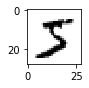

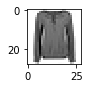

In [0]:
result1 = plot_verify(img_m1,img_f1)

In [0]:
data2 = make_data(2000,1000)
loader2 = DataLoader(data2,batch_size=1,shuffle=False)

In [0]:
for i,(img,label) in enumerate(loader2):
    if i == 2000:
        img_m2 = img
    if i == 1999:
        img_f2 = img

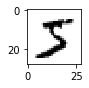

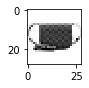

In [0]:
result2 = plot_verify(img_m2,img_f2)

In [0]:
data3 = make_data(1000,1000)
loader3 = DataLoader(data3,batch_size=1,shuffle=False)

In [0]:
for i,(img,label) in enumerate(loader3):
    if i == 1000:
        img_m3 = img
    if i == 999:
        img_f3 = img

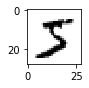

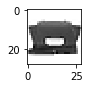

In [0]:
result3 = plot_verify(img_m3,img_f3)

In [0]:
def make_data4(fs1,ms1,fs2,ms2):
    new_data= []
    mc,fc = 0,0
    
    while mc < 60000 and fc < 60000:
        
        for i in range(fc,fc+fs1):
            new_data.append(train_fashion[i])
        fc += fs1
        for i in range(mc,mc+ms1):
            new_data.append(train_mnist[i])
        mc += ms1
        for i in range(fc,fc+fs2):
            new_data.append(train_fashion[i])
        fc += fs2
        for i in range(mc,mc+ms2):
            new_data.append(train_mnist[i])
        mc += ms2
        
    if mc < 60000:
        for i in range(mc,60000):
            new_data.append(train_mnist[i])
            
    if fc < 60000:
        for i in range(fc,60000):
            new_data.append(train_fashion[i])
    
    return new_data

In [0]:
data4 = make_data4(200,1000,100,500)
loader4 = DataLoader(data4,batch_size=1,shuffle=False)

In [0]:
for i,(img,label) in enumerate(loader4):
    if i == 200:
        img_m41 = img
    if i == 199:
        img_f41 = img
    if i == 1199:
        img_m42 = img
    if i == 1200:
        img_f42 = img

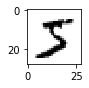

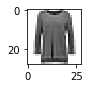

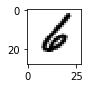

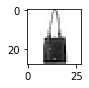

In [0]:
result41 = plot_verify(img_m41,img_f41)
result42 = plot_verify(img_m42,img_f42)

In [0]:
def make_data5():
    new_data = []
    for i in range(10000):
        new_data.append(test_fashion[i])
        new_data.append(test_mnist[i])
    return new_data

In [0]:
data5 = make_data5()
loader5 = DataLoader(data5,batch_size=1,shuffle=False)

In [0]:
for i,(img,label) in enumerate(loader5):
    if i == 1:
        img_m51 = img
    if i == 0:
        img_f51 = img
    if i == 199:
        img_m52 = img
    if i == 200:
        img_f52 = img

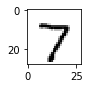

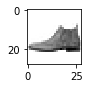

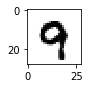

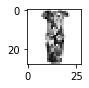

In [0]:
result51 = plot_verify(img_m51,img_f51)
result52 = plot_verify(img_m52,img_f52)

# 4.4

In [0]:
model_m = torch.load('mnist.pt')
model_f = torch.load('fashion.pt')

In [0]:
eta = 0.01
alpha1 = 11/120000

### for data1, shift = 11, sequence = 120000, so alpha1 = 11/120000

In [0]:
ws0 = np.array([0.5,0.5])
wm0 = np.array([0,0])

In [0]:
loader1 = DataLoader(data1,batch_size=1,shuffle=False)

In [0]:
def Pred(x,v,m1,m2):
    #print(v)
    m1 = m1.to(device)
    m2 = m2.to(device)
    y1 = m1.forward(x.to(device)) 
    y2 = m2.forward(x.to(device))
    #print(y1)
   
    
    y1 = v[0] * y1
    y2 = v[1] * y2
    y = y1 + y2
    y = y.argmax(1)
    #print(y)
    
    return y
                     

In [0]:
def Loss(X_train,y_train):
    
    cr = nn.CrossEntropyLoss()
    loss1 = cr(model_m(X_train.to(device)),y_train.to(device))
    loss2 = cr(model_f(X_train.to(device)),y_train.to(device))
    loss = np.zeros(shape=2)
    loss[0] = loss1
    loss[1] = loss2
    return loss

In [0]:
def find_best_expert(alpha,loader):
    best_experts = []
    ws = ws0
    losses = []

    for j,(X_train,y_train) in enumerate(loader):
        vs = ws / sum(ws)
        if j%10000 == 0:
            print('vs',vs)
        y_hat = Pred(X_train,vs,model_m,model_f)
        #print(y_hat)
        loss = Loss(X_train,y_train)
        losses.append(loss)
        ex = np.array([np.exp(-1*eta*i) for i in loss])
        wm = np.array([ex[0]*ws[0],ex[1]*ws[1]])
        pool = alpha * sum(wm)
        ws = (1-alpha)*wm + (pool-alpha*wm)
        if loss[0] > loss[1]:
            best_expert = 1
        else:
            best_expert = 2
        best_experts.append(best_expert)
    
    vs = ws / sum(ws)
        
    return vs, best_experts, losses

In [0]:
vs1, best_experts1, losses1 = find_best_expert(alpha1,loader1)

vs [0.5 0.5]
vs [0.00263506 0.99736494]
vs [0.99867206 0.00132794]
vs [0.00277241 0.99722759]
vs [0.99815383 0.00184617]
vs [0.00302219 0.99697781]
vs [0.99886197 0.00113803]
vs [0.0028782 0.9971218]
vs [0.99823267 0.00176733]
vs [0.00266897 0.99733103]
vs [0.99840943 0.00159057]
vs [0.00307446 0.99692554]


In [0]:
vs1

array([0.99898583, 0.00101417])

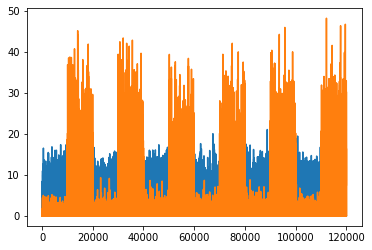

In [0]:
plt.plot(losses1)

In [0]:
def test_best_expert(vs):
    cor_num = 0
    for j,(X_test,y_test) in enumerate(loader5):
        y_pre_test = Pred(X_test.to(device),vs,model_m,model_f)
        if y_test.to(device) == y_pre_test:
            cor_num += 1
    
    cor_rate = cor_num / 20000
    
    return cor_rate

In [0]:
test_best_expert(vs1)

0.56435

### For data2, shift times = 30, sequence length = 120000, so alpha2 = 1/4000

In [0]:
alpha2 = 1/4000

In [0]:
loader2 = DataLoader(data2,batch_size=1,shuffle=False)

In [0]:
vs2, best_experts2, losses2 = find_best_expert(alpha2,loader2)

vs [0.5 0.5]
vs [0.00816407 0.99183593]
vs [0.00739229 0.99260771]
vs [0.9963861 0.0036139]
vs [0.00689504 0.99310496]
vs [0.00736274 0.99263726]
vs [0.99498031 0.00501969]
vs [0.00784378 0.99215622]
vs [0.00735403 0.99264597]
vs [0.9969019 0.0030981]
vs [0.99519399 0.00480601]
vs [0.99567334 0.00432666]


In [0]:
vs2

array([0.99723851, 0.00276149])

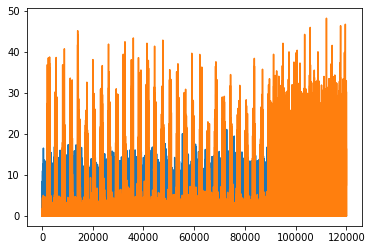

In [0]:
plt.plot(losses2)

In [0]:
test_best_expert(vs2)

0.5663

### For data3, shift times = 60, sequence length = 120000, so alpha3 = 1/2000

In [0]:
alpha3 = 1/2000

In [0]:
loader3 = DataLoader(data3,batch_size=1,shuffle=False)

In [0]:
vs3, best_experts3, losses3 = find_best_expert(alpha3,loader3)

vs [0.5 0.5]
vs [0.99191677 0.00808323]
vs [0.99279667 0.00720333]
vs [0.99188081 0.00811919]
vs [0.990009 0.009991]
vs [0.99325292 0.00674708]
vs [0.99382162 0.00617838]
vs [0.99393879 0.00606121]
vs [0.99043209 0.00956791]
vs [0.99025925 0.00974075]
vs [0.99138224 0.00861776]
vs [0.99449405 0.00550595]


In [0]:
vs3

array([0.99449094, 0.00550906])

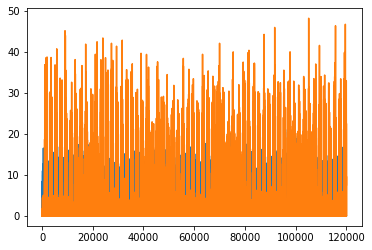

In [0]:
plt.plot(losses3)

In [0]:
test_best_expert(vs3)

0.5691

### For data4, shift times = 40, sequence length = 120000, so alpha4 = 1/3000

In [0]:
alpha4 = 1/3000

In [0]:
loader4 = DataLoader(data4,batch_size=1,shuffle=False)

In [0]:
vs4, best_experts4, losses4 = find_best_expert(alpha4,loader4)

vs [0.5 0.5]
vs [0.99583972 0.00416028]
vs [0.10426992 0.89573008]
vs [0.99549244 0.00450756]
vs [0.99535264 0.00464736]
vs [0.99530237 0.00469763]
vs [0.99258706 0.00741294]
vs [0.99673147 0.00326853]
vs [0.01000968 0.98999032]
vs [0.01090431 0.98909569]
vs [0.01038881 0.98961119]
vs [0.00963896 0.99036104]


In [0]:
vs4

array([0.01109137, 0.98890863])

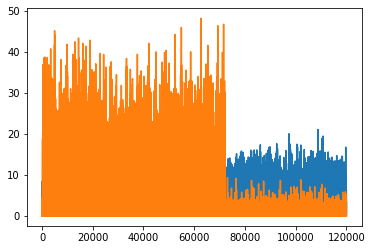

In [0]:
plt.plot(losses4)

In [0]:
test_best_expert(vs4)

0.50425